### notebook purpose

- evaluate mask types across...
    - square v rect central region
    - different sampling patterns across e1, e2

In [13]:
import os, sys
from os import listdir
from os.path import isfile, join, isdir
import numpy as np
import matplotlib.pyplot as plt
import torch

sys.path.append('/home/vanveen/ConvDecoder/')
from utils.evaluate import calc_metrics_imgs, plot_row_qdess
from utils.data_io import get_mtr_ids_and, load_imgs, load_h5_qdess

### understanding channel routing w e1/e2 and re/im

- we have [e1 | e2] complex, eight channels each
- we have [re(e1) | re(e2) | im(e1) | im(e2)] real, eight channels each

# TODO
- make sure we're doing this correctly as built now
- build empirical loss adjustment per akshay rec
- delete unnecessary code below

### delete me later: prototype applying separate masks

In [ ]:
file_id = '005'
ksp = load_h5_qdess(file_id)

# load, concat both echo slices
idx_kx = ksp.shape[0] // 2 # want central slice in kx (axial) b/c we undersample in (ky,kz)
ksp_echo1 = ksp[:,:,:,0,:].permute(3,0,1,2)[:, idx_kx, :, :]
ksp_echo2 = ksp[:,:,:,1,:].permute(3,0,1,2)[:, idx_kx, :, :]
ksp_orig = torch.cat((ksp_echo1, ksp_echo2), 0)

In [ ]:
ksp_orig[:8].mean(), ksp_orig[8:].mean()

In [34]:
from utils.transform import fft_2d, ifft_2d, reshape_complex_vals_to_adj_channels, \
                            reshape_adj_channels_to_complex_vals

In [29]:
from include.decoder_conv import init_convdecoder

net, net_input, ksp_orig_ = init_convdecoder(ksp_orig)

In [31]:
out = net(net_input)
out.shape

torch.Size([1, 32, 512, 160])

In [33]:
img_masked = ifft_2d(ksp_masked)

In [35]:
img_masked_ = reshape_complex_vals_to_adj_channels(img_masked)[None,:]

In [36]:
print(img_masked.shape, img_masked_.shape)

torch.Size([16, 512, 160]) torch.Size([1, 32, 512, 160])


### prototyping code ends here. keep code below, delete above

In [2]:
accel = 4
path_base = '/bmrNAS/people/dvv/out_qdess/accel_{}x/echo_joint/'.format(accel)

path_1 = path_base + 'mask_rect/'
path_2 = path_base + 'mask_square/'
path_gt = path_base + 'gt/'

In [3]:
mtr_id_list = get_mtr_ids_and(path_1, path_2)

imgs_gt = load_imgs(mtr_id_list, path=path_gt)
imgs_rect = load_imgs(mtr_id_list, path=path_1)
imgs_square = load_imgs(mtr_id_list, path=path_2)

metrics_square = calc_metrics_imgs(imgs_gt, imgs_square)
metrics_rect = calc_metrics_imgs(imgs_gt, imgs_rect)

/home/vanveen/heck/lib/python3.8/site-packages/pytorch_msssim/ssim.py:50: UserWarning: Skipping Gaussian Smoothing at dimension 2+1 for input: torch.Size([1, 1, 32, 10]) and win size: 11
  warnings.warn(


In [4]:
print(mtr_id_list)
print(np.around(np.mean(metrics_square, 0), 4))
print(np.around(np.mean(metrics_rect, 0), 4))

['005', '006', '030', '034', '048', '052', '065', '066', '080', '096', '099', '120']
[[ 0.902   0.9701  0.8605 33.0566]
 [ 0.7774  0.9425  0.7958 33.041 ]]
[[ 0.8972  0.9725  0.8685 33.2347]
 [ 0.7799  0.9473  0.7993 33.2986]]


In [6]:
for idx_s, mtr_id in enumerate(mtr_id_list):
    
    print(mtr_id)
    print(metrics_square[idx_s])
    print(metrics_rect[idx_s])
    sys.exit()

005
[[ 0.8912  0.971   0.8675 33.1931]
 [ 0.5776  0.913   0.7078 30.8308]]
[[ 0.8927  0.9725  0.868  33.3028]
 [ 0.6068  0.9196  0.7084 31.2049]]


SystemExit: 

SystemExit: 

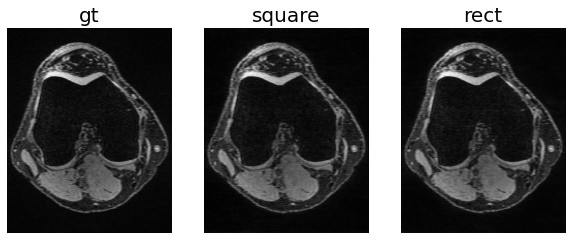

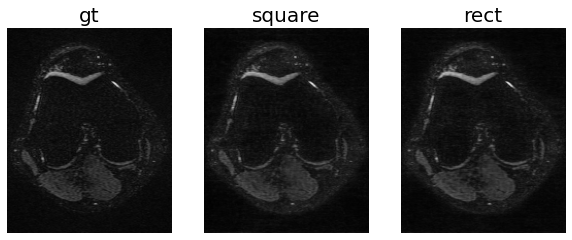

In [9]:
title_list = ['gt', 'square', 'rect']

for idx_s in np.arange(imgs_gt.shape[0]):
    for idx_e in np.arange(imgs_gt.shape[1]):
        
        im_gt, im1, im2 = imgs_gt[idx_s, idx_e], \
                          imgs_square[idx_s, idx_e], \
                          imgs_rect[idx_s, idx_e]
                
        plot_row_qdess([im_gt, im1, im2], title_list, clim=None)
        
    sys.exit()